# UMAPs Neurips samples, NK cells

EG37, EG44, EG45, EG48, EG49, EG50, EG51, EG52, EG53, EG59, EG60, EG61, EG62, EG63 are AML cases.

In this notebook samples are merged together, after which NK cell cluster is defined and NK cells are selected for further analysis. All UMAPs are generated based on latent space coordinates. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap
import textwrap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG37_norm.h5ad')

In [3]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG44_norm.h5ad')

In [4]:
#Easigenomics dataset, only one sample

adata2 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG45_norm.h5ad')

In [5]:
#Easigenomics dataset, only one sample

adata3 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG48_norm.h5ad')

In [6]:
#Easigenomics dataset, only one sample

adata4 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG49_norm.h5ad')

In [7]:
#Easigenomics dataset, only one sample

adata5 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG50_norm.h5ad')

In [8]:
#Easigenomics dataset, only one sample

adata6 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG51_norm.h5ad')

In [9]:
#Easigenomics dataset, only one sample

adata7 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG52_norm.h5ad')

In [10]:
#Easigenomics dataset, only one sample

adata8 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG53_norm.h5ad')

In [11]:
#Easigenomics dataset, only one sample

adata9 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG59_norm.h5ad')

In [12]:
#Easigenomics dataset, only one sample

adata10 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG60_norm.h5ad')

In [13]:
#Easigenomics dataset, only one sample

adata11 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG61_norm.h5ad')

In [14]:
#Easigenomics dataset, only one sample

adata12 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG62_norm.h5ad')

In [15]:
#Easigenomics dataset, only one sample

adata13 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG63_norm.h5ad')

In [16]:
adata_merged = adata.concatenate(adata1,adata2,adata3,adata4,adata5,adata6,adata7,
                                 adata8,adata9,adata10,adata11,adata12,adata13, 
                                 index_unique=None)

In [17]:
adata_merged.obs['cell_type']

AAACGGGTCTTCTGGC-1-117         NKT
AAAGATGTCCTCCTAG-1-117    leukemic
AACCATGAGCCACTAT-1-117    leukemic
AAGCCGCCATGGTCAT-1-117    leukemic
AAGGAGCAGCGCTTAT-1-117         NKT
                            ...   
TTTGTCACAATCGGTT-1-130    leukemic
TTTGTCACACGAGGTA-1-130    leukemic
TTTGTCAGTATAGGTA-1-130    leukemic
TTTGTCAGTCGATTGT-1-130    leukemic
TTTGTCATCTTCGAGA-1-130    leukemic
Name: cell_type, Length: 26365, dtype: object

In [18]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [19]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [20]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [21]:
adata_merged

AnnData object with n_obs × n_vars = 26365 × 7277
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions-10', 'dispersions_

In [22]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

In [23]:
adata_merged.X

<26365x7277 sparse matrix of type '<class 'numpy.float32'>'
	with 55184841 stored elements in Compressed Sparse Row format>

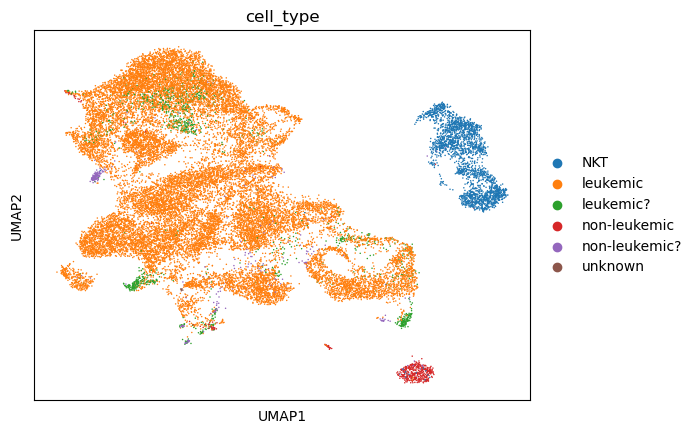

In [24]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

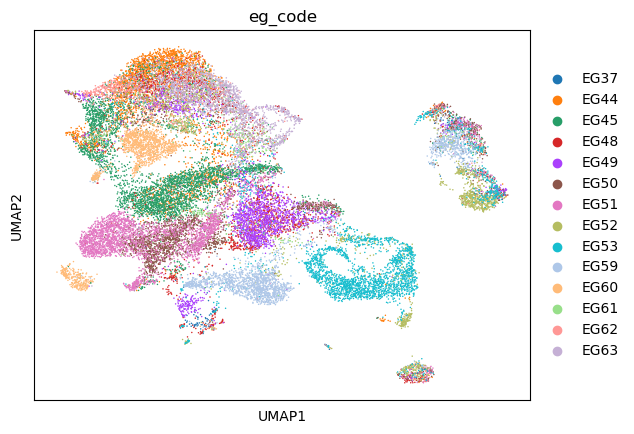

In [25]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [26]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [27]:
sc.tl.leiden(adata_merged, resolution = 1, key_added = "leiden_1")

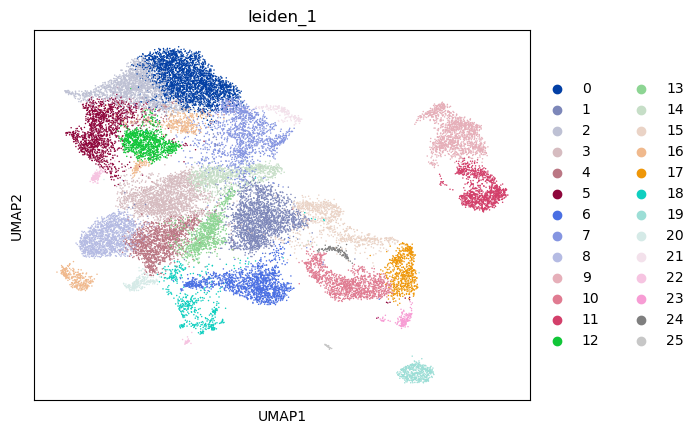

In [28]:
sc.pl.umap(adata_merged, color=['leiden_1'], ncols =3)

In [29]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [30]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



GNLY
GPR56
NKG7
TTC38
PLAC8
MBP


In [31]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




B2M
HLA-DRA
IRF7
EIF2AK2
BCL2L11
CCL4
CD69


In [32]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['GNLY',
 'GPR56',
 'NKG7',
 'TTC38',
 'PLAC8',
 'MBP',
 'B2M',
 'HLA-DRA',
 'IRF7',
 'EIF2AK2',
 'BCL2L11',
 'CCL4',
 'CD69']

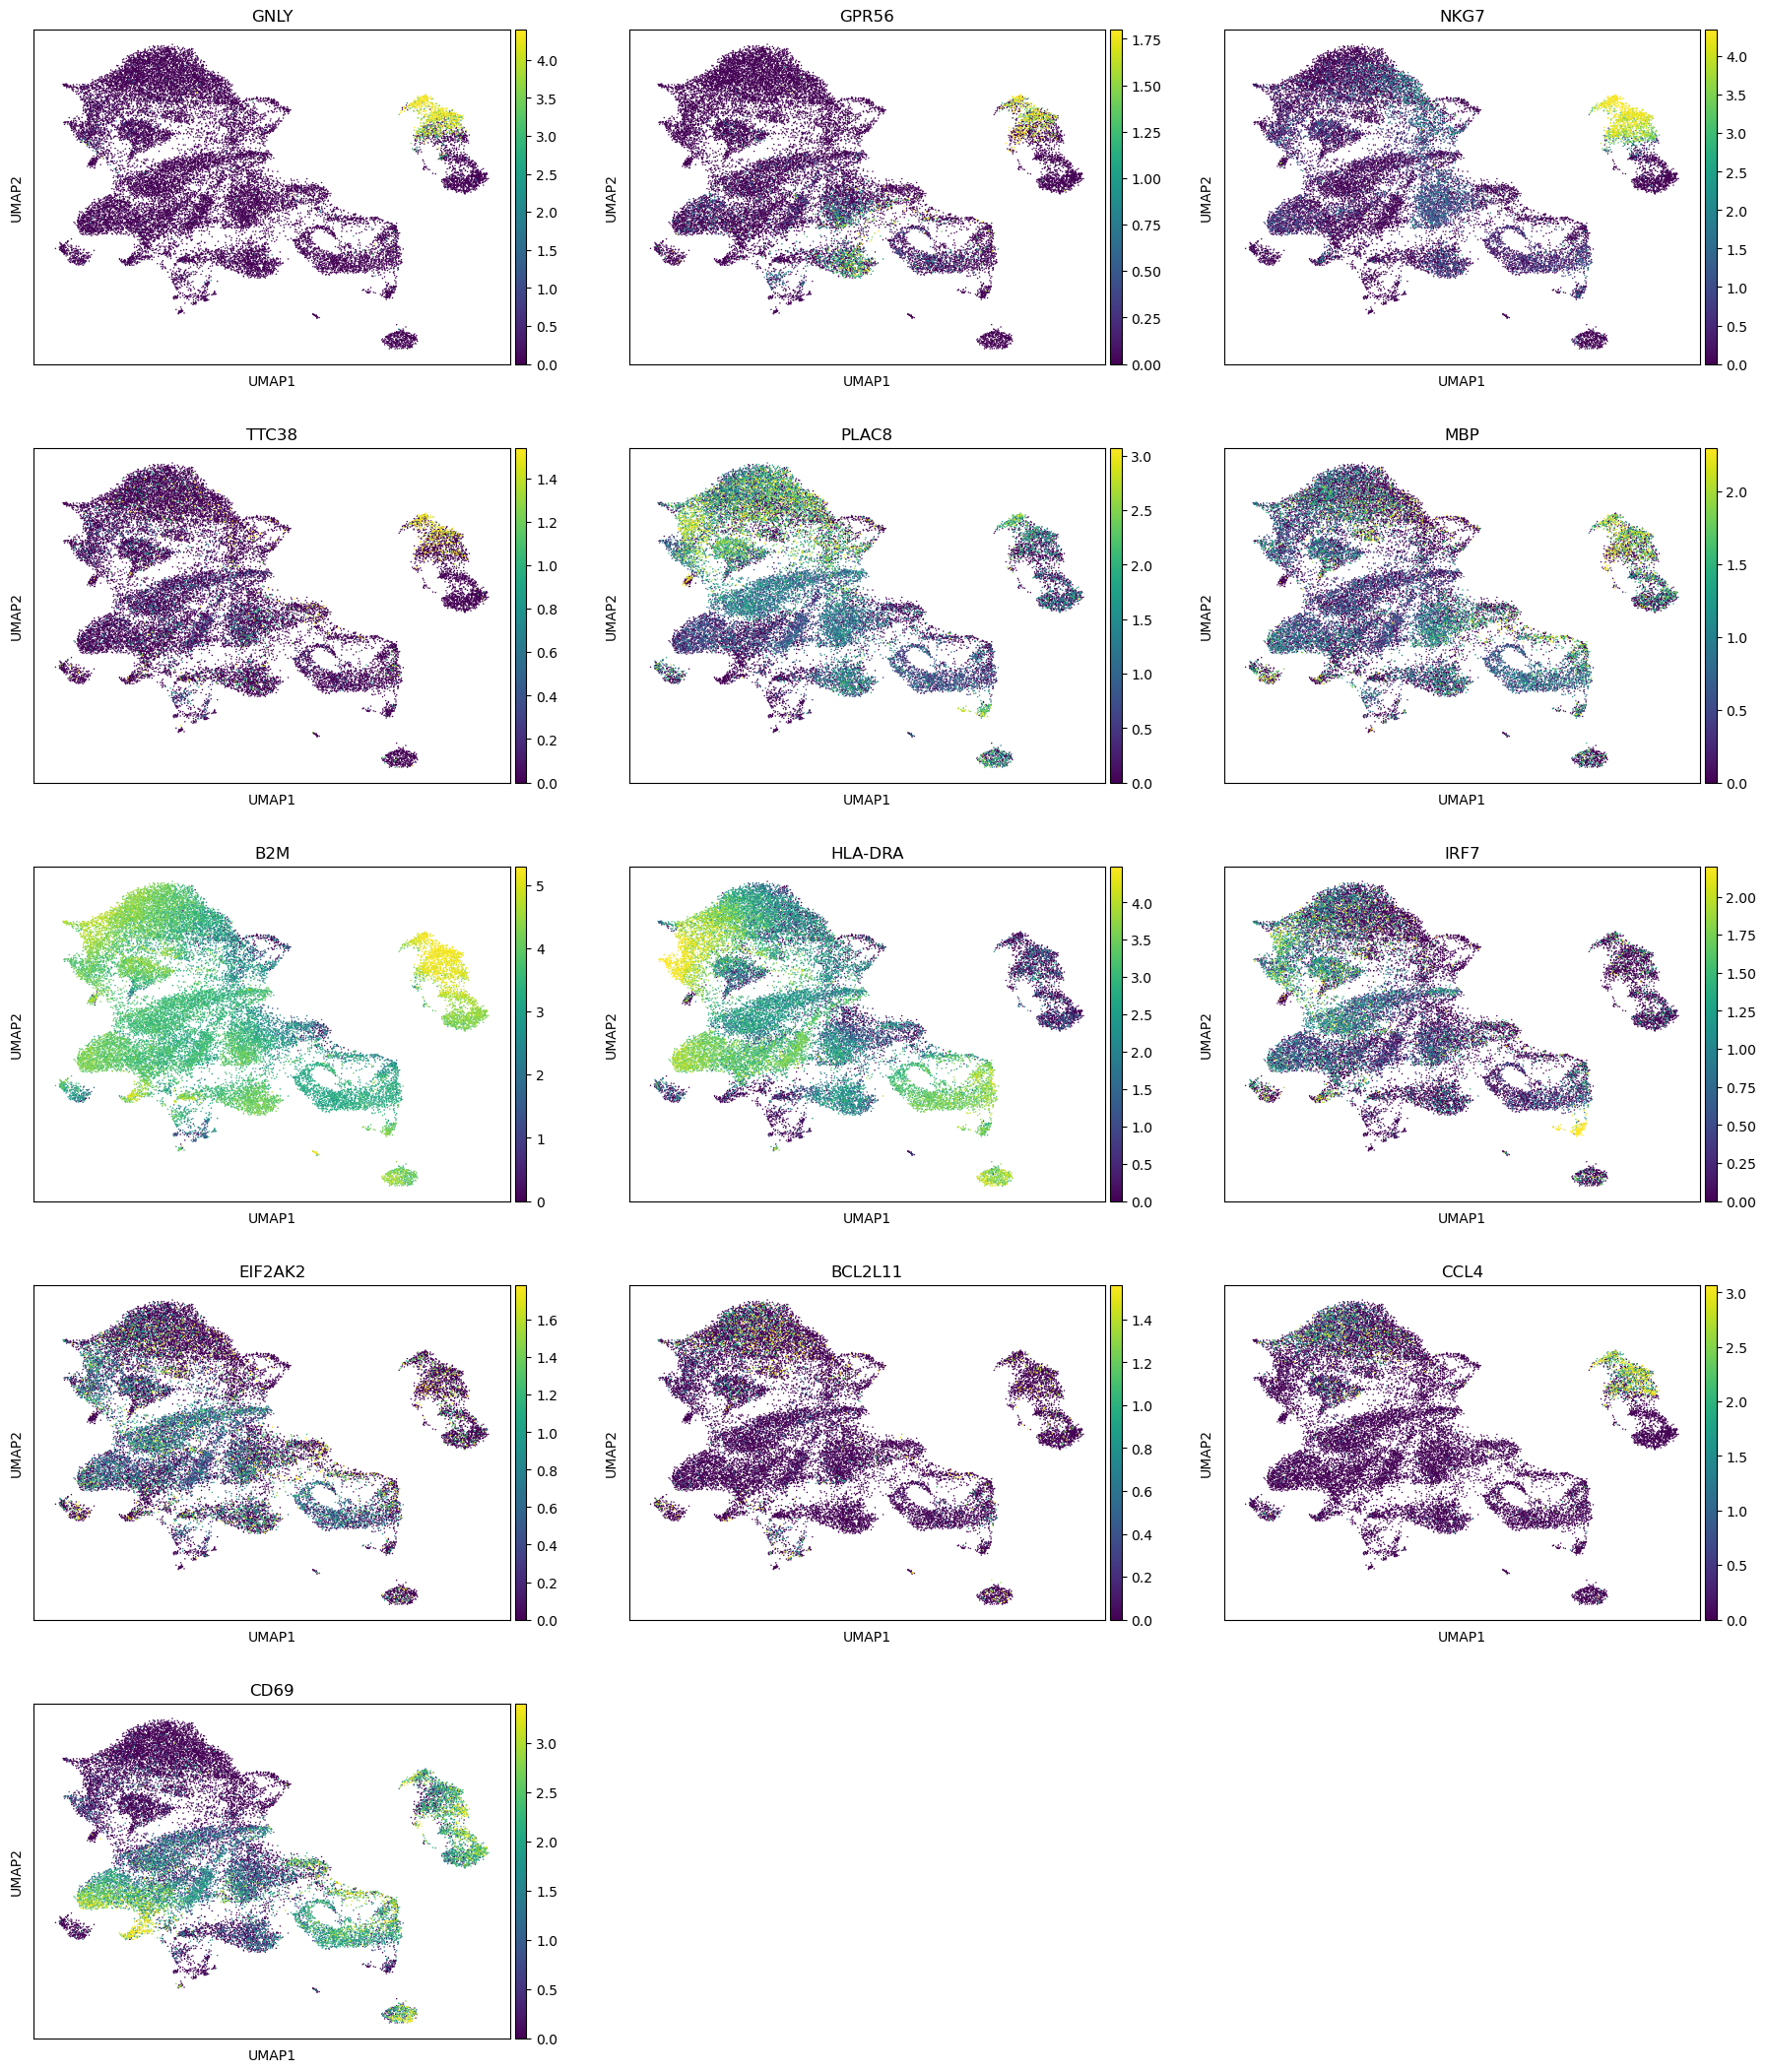

In [33]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

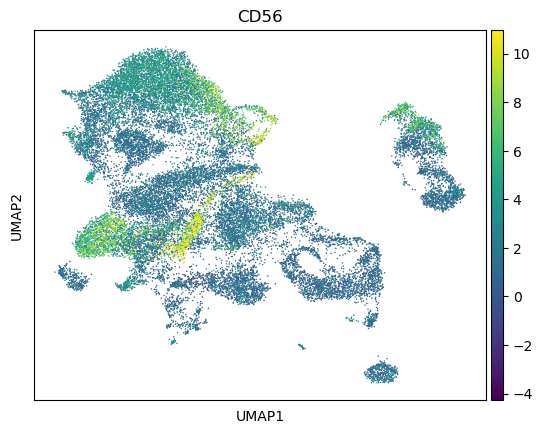

In [34]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

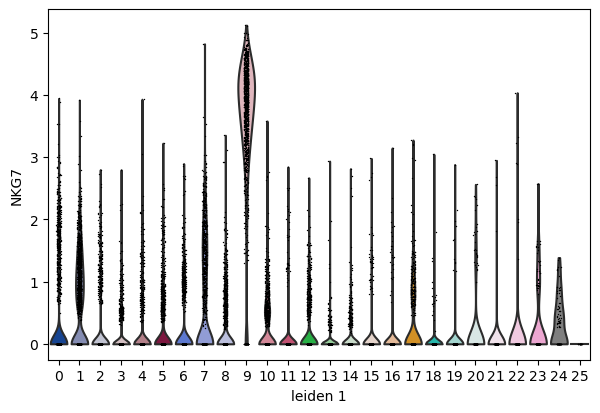

In [35]:
sc.pl.violin(adata_merged, ['NKG7'], groupby='leiden_1')

- Based on protein + RNA marker expression cluster 9 can be identified as NK cells. 


In [36]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/AML_norm.h5ad')